In [1]:
import pandas as pd 
import os
import codecs
import csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import requests
import json

In [4]:
import sys

In [5]:
import random

In [6]:
import copy

# Por Ciudades

In [7]:
def readCsv(path):

    os.chdir(path)
    system = {}

    onlyfiles = [f for f in os.listdir() if os.path.isfile(f)]

    print(onlyfiles)
    for f in onlyfiles:
        system[f] = pd.read_csv(f, encoding='utf8')

    return onlyfiles, system

In [8]:
a, b = readCsv(r"C:\Users\Usuario\Python_Notebooks\Mercurio\Country_View\shopfy_Country_Views")

['visits_2020-01-01_2020-11-30.csv', 'visits_2020-01-01_2020-12-01.csv', 'visits_2020-10-01.csv', 'visits_2020-10-01_co.csv']


In [9]:
type(b)

dict

In [10]:
b["visits_2020-01-01_2020-12-01.csv"].columns

Index(['month', 'location_city', 'location_country', 'total_visitors',
       'total_sessions', 'total_carts', 'total_checkouts', 'total_conversion',
       'total_orders_placed'],
      dtype='object')

In [11]:
os.chdir(r"C:\Users\Usuario\Python_Notebooks\Mercurio\Validaciones\Flows")
shp_Oct_rw = pd.read_csv("visits_2020-10-01.csv")

In [12]:
shp_Oct_rw

,week,location_city,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
0,2020-W40,Igualada,1,0,0,0,0.0
1,2020-W40,Brugge,1,0,0,0,0.0
2,2020-W40,Pontarlier,1,0,0,0,0.0
3,2020-W40,Bezons,1,0,0,0,0.0
4,2020-W40,Lloret De Mar,2,0,0,0,0.0
...,...,...,...,...,...,...,...
4722,2020-W44,Ixelles,3,0,0,0,0.0
4723,2020-W44,Beverwijk,1,0,0,0,0.0
4724,2020-W44,Ares,1,0,0,0,0.0
4725,2020-W44,Juchen,1,0,0,0,0.0


In [13]:
def removeCols(df, col):

    schp_year_cols = list(df.columns)
    selc_cols = schp_year_cols.remove(col)
    schp_year = df[schp_year_cols]

    return schp_year

In [14]:
lst_group = removeCols(b["visits_2020-01-01_2020-12-01.csv"],"location_city")

In [15]:
lst_group.head()

,month,location_country,total_visitors,total_sessions,total_carts,total_checkouts,total_conversion,total_orders_placed
0,2020-01,Spain,2,2,0,0,0.0,0
1,2020-01,Czech Republic,1,1,0,0,0.0,0
2,2020-01,Spain,3,3,0,0,0.0,0
3,2020-01,Austria,1,1,0,0,0.0,0
4,2020-01,Belgium,1,1,0,0,0.0,0


In [16]:
schp_Oct_cols = list(shp_Oct_rw.columns)
selc_cols = schp_Oct_cols.remove("week")
schp_Oct = shp_Oct_rw[schp_Oct_cols]

In [17]:
schp_Oct

,location_city,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
0,Igualada,1,0,0,0,0.0
1,Brugge,1,0,0,0,0.0
2,Pontarlier,1,0,0,0,0.0
3,Bezons,1,0,0,0,0.0
4,Lloret De Mar,2,0,0,0,0.0
...,...,...,...,...,...,...
4722,Ixelles,3,0,0,0,0.0
4723,Beverwijk,1,0,0,0,0.0
4724,Ares,1,0,0,0,0.0
4725,Juchen,1,0,0,0,0.0


In [18]:
schp_Oct_gr = schp_Oct.groupby("location_city").sum()

In [19]:
schp_year_gr = lst_group.groupby(["location_country","month"]).sum()

In [20]:
schp_Oct_gr.head()

,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
location_city,,,,,
's-gravenhage,4,0,0,0,0.0
's-gravenzande,8,0,0,0,0.0
's-hertogenbosch,22,0,0,0,0.0
A Coruña,5,0,0,0,0.0
Aachen,7,0,0,0,0.0


In [21]:
len(schp_Oct_gr)

2831

- Vemos que tenemos 2831 ciudades donde se ha registrado actividad.
- Vamos rescatar aquellas donde la actividad sea mas abundante.

In [22]:
#Analizamos actividad max y min de los eventos.
for col in schp_Oct_gr.columns:
    mx_t = max(schp_Oct_gr[col])
    mi_t = min(schp_Oct_gr[col])
    av_t = np.mean(schp_Oct_gr[col])
    va_t = np.var(schp_Oct_gr["total_sessions"])
    
    print("########################################################")
    print("Valor max de la columna %s es: %s" % (col, mx_t))
    print("Valor min de la columna %s es: %s" % (col, mi_t))
    print("Valor medio de la columna %s es: %s" % (col, av_t))
    print("Valor varianza de la columna %s es: %s" % (col, va_t))
    print("########################################################")


########################################################
Valor max de la columna total_sessions es: 787
Valor min de la columna total_sessions es: 1
Valor medio de la columna total_sessions es: 4.493111974567291
Valor varianza de la columna total_sessions es: 490.4880309725869
########################################################
########################################################
Valor max de la columna total_carts es: 16
Valor min de la columna total_carts es: 0
Valor medio de la columna total_carts es: 0.0798304486047333
Valor varianza de la columna total_carts es: 490.4880309725869
########################################################
########################################################
Valor max de la columna total_checkouts es: 8
Valor min de la columna total_checkouts es: 0
Valor medio de la columna total_checkouts es: 0.03673613564111621
Valor varianza de la columna total_checkouts es: 490.4880309725869
########################################################
###

In [23]:
def firstInform(df):
    # Analizamos actividad max y min de los eventos.
    for col in df.columns:
        
        mx_t = max(df[col])
        countMounth_max = list(df[col].loc[df[col] == mx_t].index)
        maxMounth = str(countMounth_max[0][1])
        maxCounty = str(countMounth_max[0][0])
        
        mi_t = min(df[col])
        countMounth_min = list(df[col].loc[df[col] == mi_t].index)
        minMounth = str(countMounth_min[0][1])
        minCounty = str(countMounth_min[0][0])
        
        av_t = np.mean(df[col])
        va_t = np.var(df["total_sessions"])
        
        

        print("########################################################")
        print("Valor max de la columna '{0}' es: '{1}' \n para pais: '{2}' y fecha:'{3}'".format(col, mx_t, maxCounty, maxMounth))
        print("Valor min de la columna '{0}' es: '{1}' \n para pais: '{2}' y fecha:'{3}'".format(col, mi_t, minCounty, minMounth))
        print("Valor medio de la columna %s es: %s" % (col, av_t))
        print("Valor varianza de la columna %s es: %s" % (col, va_t))
        print("########################################################")


In [24]:
firstInform(schp_year_gr)

########################################################
Valor max de la columna 'total_visitors' es: '4294' 
 para pais: 'Spain' y fecha:'2020-09'
Valor min de la columna 'total_visitors' es: '1' 
 para pais: 'Afghanistan' y fecha:'2020-08'
Valor medio de la columna total_visitors es: 181.81559220389806
Valor varianza de la columna total_visitors es: 354194.65942291234
########################################################
########################################################
Valor max de la columna 'total_sessions' es: '4972' 
 para pais: 'Spain' y fecha:'2020-09'
Valor min de la columna 'total_sessions' es: '1' 
 para pais: 'Afghanistan' y fecha:'2020-08'
Valor medio de la columna total_sessions es: 207.0569715142429
Valor varianza de la columna total_sessions es: 354194.65942291234
########################################################
########################################################
Valor max de la columna 'total_carts' es: '138' 
 para pais: 'Netherlands' y fecha:'

In [25]:
mx_t = max(schp_year_gr["total_sessions"])
mi_t = min(schp_year_gr["total_sessions"])
av_t = np.mean(schp_year_gr["total_sessions"])   
va_t = np.var(schp_year_gr["total_sessions"])

In [26]:
countMounth =schp_year_gr["total_sessions"].loc[schp_year_gr["total_sessions"] == mx_t].index

In [27]:
countMounthL =list(countMounth)
countMounthL[0][1]

'2020-09'

## Distribucion de todas las ciudades.

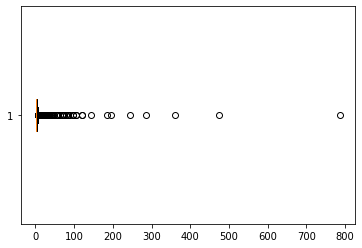

In [28]:
plt.boxplot(schp_Oct_gr["total_sessions"],vert=False)
plt.show()

In [29]:
 boxplot(len ~ dose, data = ToothGrowth,
         boxwex = 0.25, at = 1:3 - 0.2,
         subset = supp == "VC", col = "yellow",
         main = "Guinea Pigs' Tooth Growth",
         xlab = "Vitamin C dose mg",
         ylab = "tooth length",
         xlim = c(0.5, 3.5), ylim = c(0, 35), yaxs = "i")

SyntaxError: invalid syntax (<ipython-input-29-0a962fc6e10d>, line 1)

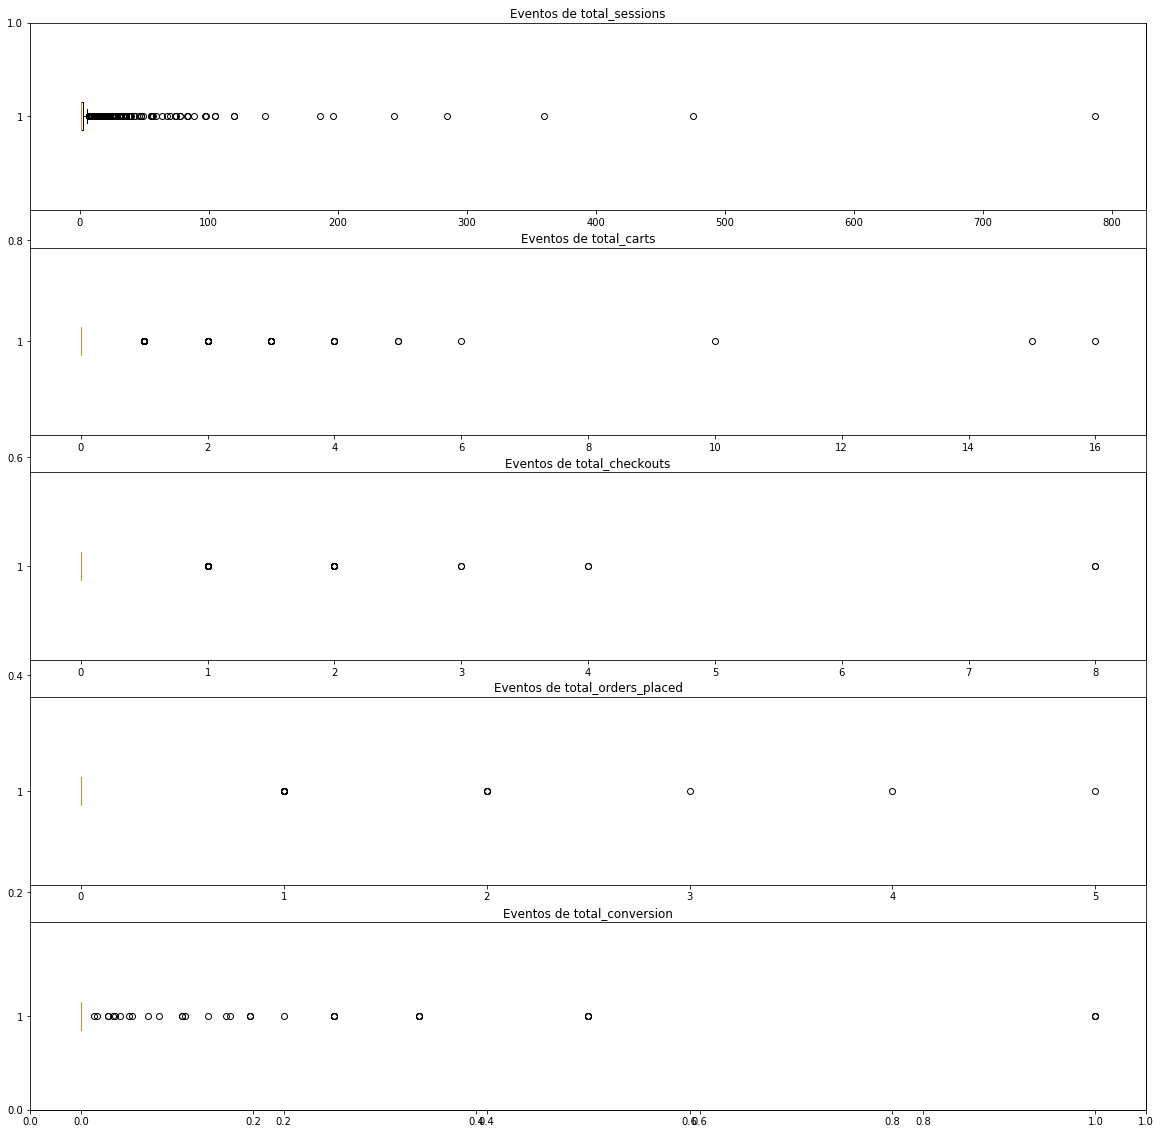

In [30]:
#fig1 = plt.figure("Vision General")
#fig1.subplots_adjust(hspace=1, wspace=1)
fig, ax = plt.subplots(figsize = (20,20), sharex = True)

i = 1
for col in schp_Oct_gr.columns:

    ax = fig.add_subplot(5, 1, i)
    plt.boxplot(schp_Oct_gr[col], vert=False)    
#Esto nos permite cambiar la horientacion de la etiquetas.
    plt.title('Eventos de %s' % col)
    i += 1

plt.show()

## Distribucion en ciudades con mas de 50 sesiones.

Vemos que la distribucion de los eventos es muy desigual. Asi que vamos a segmentar el dataframe en 2.

In [31]:
msk_tses = schp_Oct_gr["total_sessions"] > 50
mx_tses = schp_Oct_gr[msk_tses]

In [32]:
#El Dataframe con mas de 50 sesiones son
len(mx_tses)

29

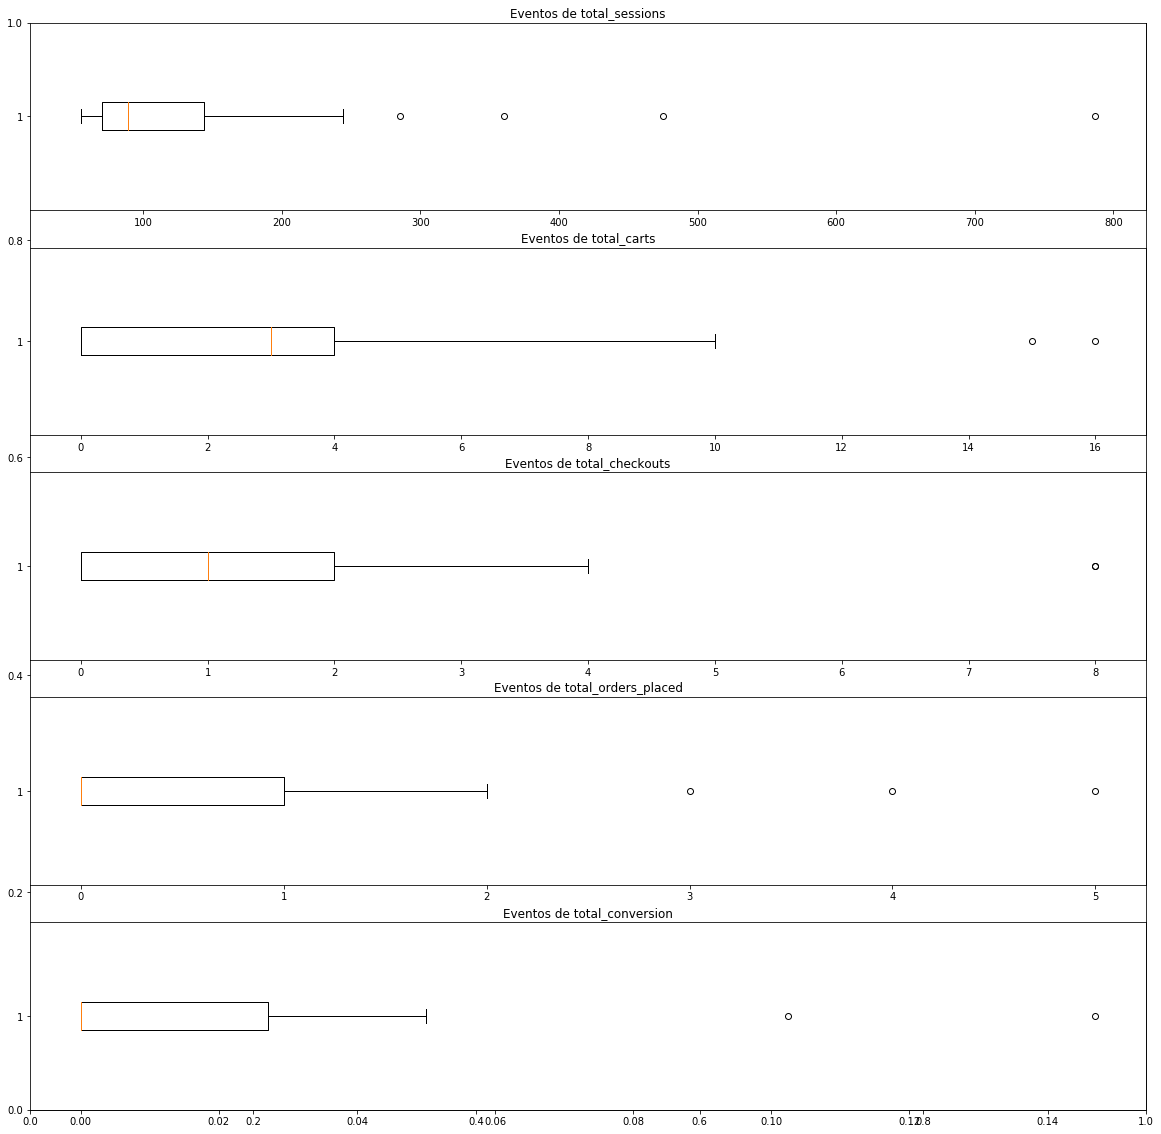

In [33]:
#fig1 = plt.figure("Vision General")
#fig1.subplots_adjust(hspace=1, wspace=1)
fig, ax = plt.subplots(figsize = (20,20), sharex = True)

i = 1
for col in mx_tses.columns:

    ax = fig.add_subplot(5, 1, i)
    plt.boxplot(mx_tses[col], vert=False)    
#Esto nos permite cambiar la horientacion de la etiquetas.
    plt.title('Eventos de %s' % col)
    i += 1

plt.show()

In [34]:
print("El numero de ciudades con mas de 50 visualizaciones es: ", str(len(mx_tses)))

El numero de ciudades con mas de 50 visualizaciones es:  29


## Distribucionen ciudades con mas de 150 sesiones.

In [35]:
msk_1_bq = schp_Oct_gr["total_sessions"] > 150
ci_1_bq = schp_Oct_gr[msk_1_bq]

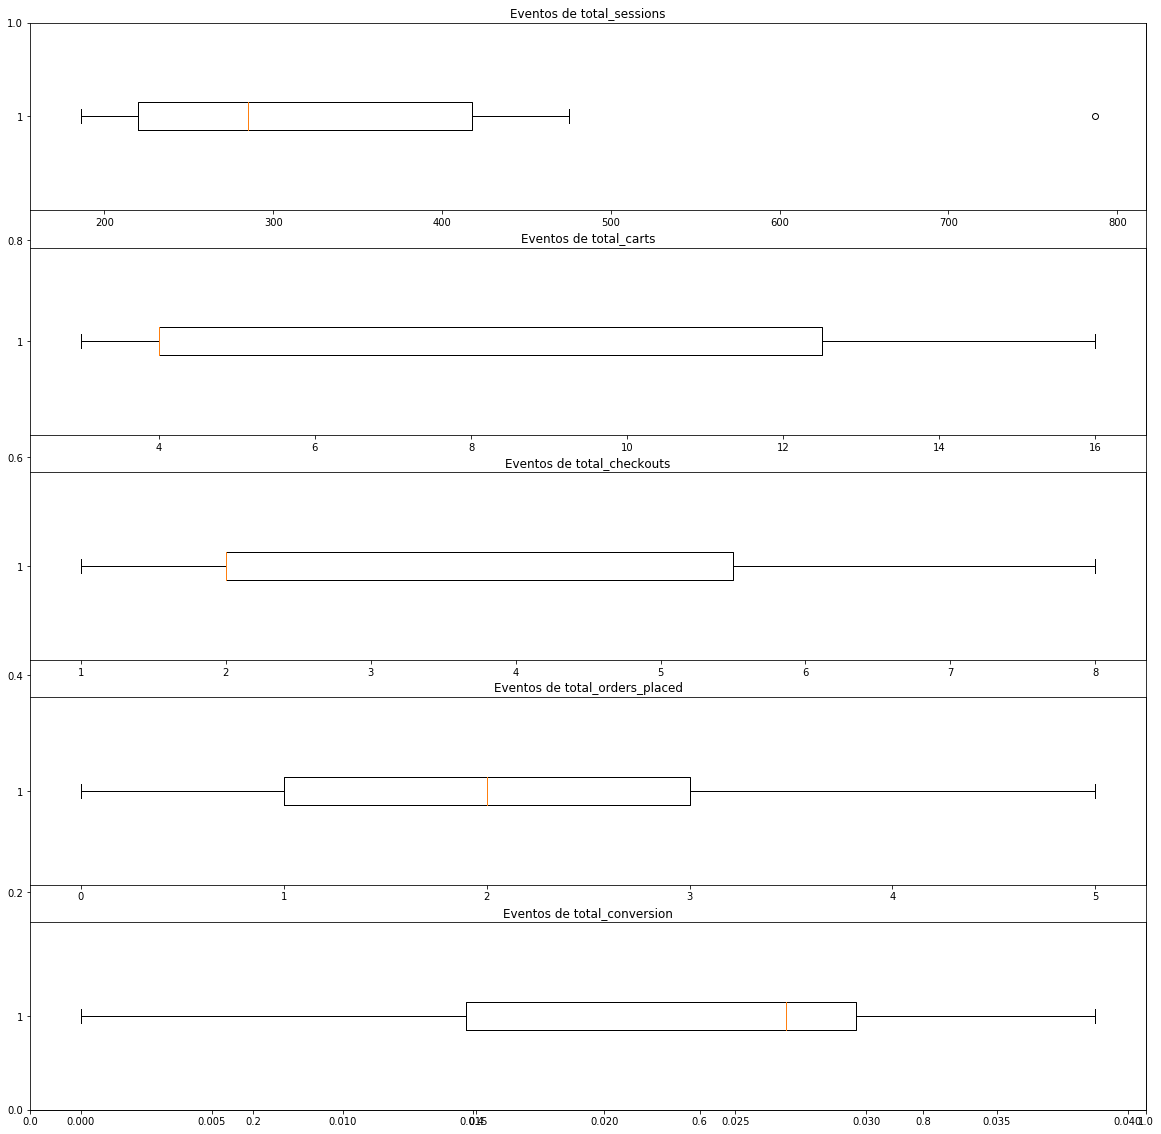

In [36]:
#fig1 = plt.figure("Vision General")
#fig1.subplots_adjust(hspace=1, wspace=1)
fig2, ax = plt.subplots(figsize = (20,20), sharex = True)

i = 1
for col in ci_1_bq.columns:

    ax = fig2.add_subplot(5, 1, i)
    plt.boxplot(ci_1_bq[col], vert=False)    
#Esto nos permite cambiar la horientacion de la etiquetas.
    plt.title('Eventos de %s' % col)
    i += 1

plt.show()

In [37]:
print("El numero de ciudades en el primer bloque es: ", str(len(ci_1_bq)))

El numero de ciudades en el primer bloque es:  7


Pasamos localizar las ciudades en paises.

Obtenemos el dataframe con la principales ciudades y sus paises.

Obtenemos el dataframe con las ciudades con mas de 50 visualizacion y sus paises.

In [38]:
mx_tses.head()

,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
location_city,,,,,
Amersfoort,68,2,1,0,0.00000
Amsterdam,475,15,8,4,0.03876
Barcelona,285,3,2,2,0.02694
Berlin,89,4,3,3,0.14692
Council Bluffs,84,0,0,0,0.00000


# Por Paises

In [39]:
shp_Oct_co_rw = pd.read_csv("visits_2020-10-01_co.csv")

In [40]:
shp_Oct_co_rw.head()

,week,location_country,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
0,2020-W40,Germany,175,2,2,0,0.00000
1,2020-W40,Spain,571,10,5,3,0.00525
2,2020-W40,Turkey,2,0,0,0,0.00000
3,2020-W40,Czech Republic,1,0,0,0,0.00000
4,2020-W40,Macau,1,0,0,0,0.00000


In [41]:
len(shp_Oct_co_rw)

161

In [42]:
#Primero vamos a analizar el computo mensual
shp_Oct_co = shp_Oct_co_rw.groupby("location_country").sum()

In [43]:
shp_Oct_co.head()

,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
location_country,,,,,
Argentina,3,0,0,0,0.00000
Australia,2,0,0,0,0.00000
Austria,125,5,2,0,0.00000
Belgium,439,10,4,3,0.03901
Brazil,5,0,0,0,0.00000


In [44]:
#for ind in shp_Oct_co.index:
#    mx_t = max(shp_Oct_co.loc[ind])
#    mi_t = min(shp_Oct_co.loc[ind])
#    av_t = np.mean(shp_Oct_co.loc[ind])
#    va_t = np.var(shp_Oct_co.loc[ind])
#    
#    print("########################################################")
#    print("Valor max del pais %s es: %s" % (ind, mx_t))
#    print("Valor min del pais  %s es: %s" % (ind, mi_t))
#    print("Valor medio del pais %s es: %s" % (ind, av_t))
#    print("Valor varianza del pais %s es: %s" % (ind, va_t))
#    print("########################################################")

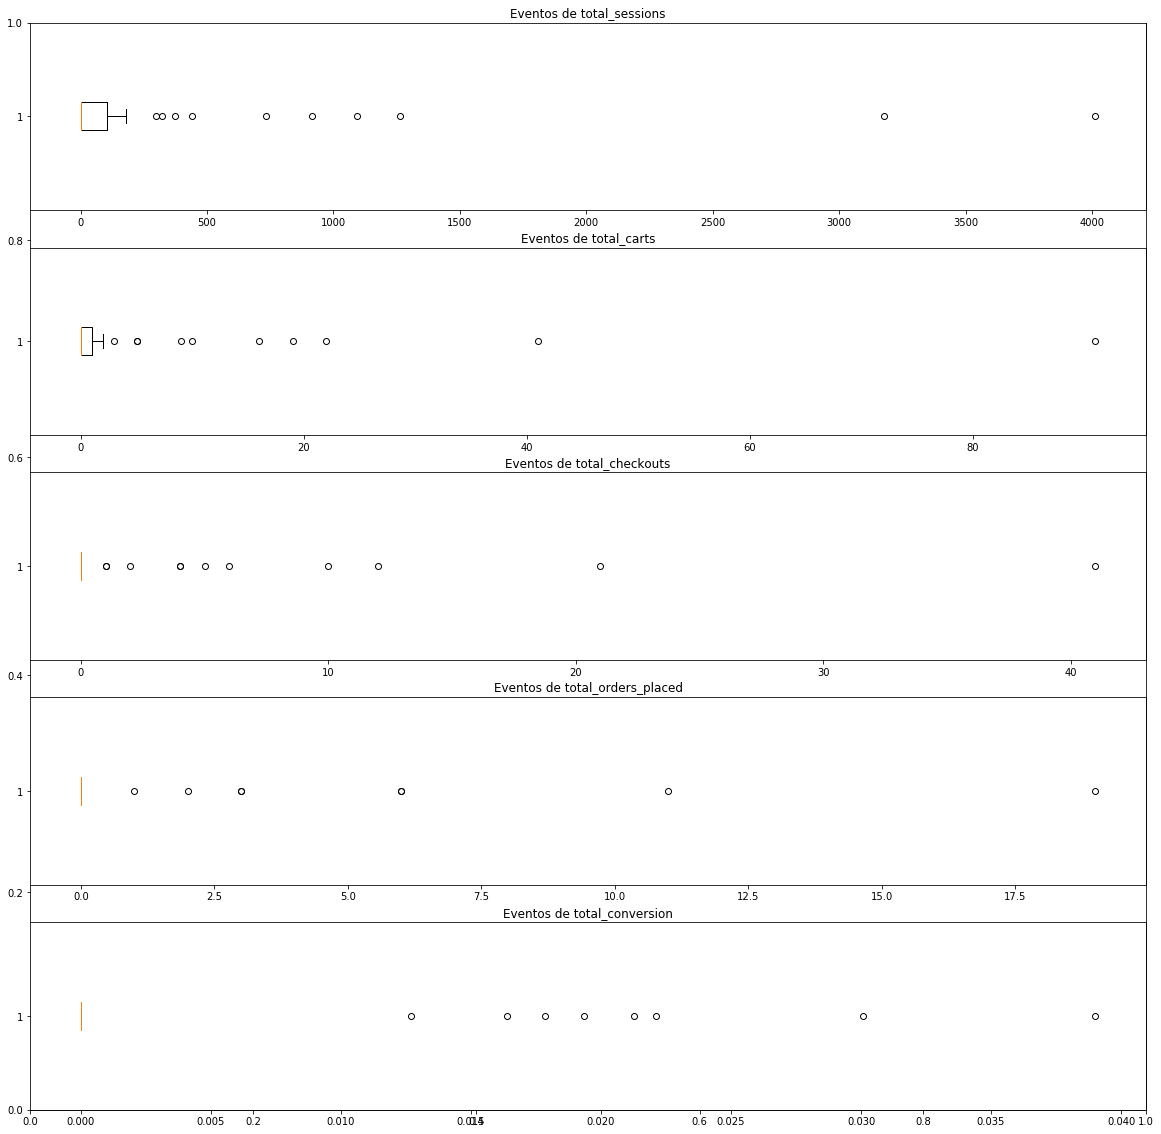

In [45]:
#fig1 = plt.figure("Vision General")
#fig1.subplots_adjust(hspace=1, wspace=1)
fig, ax = plt.subplots(figsize = (20,20), sharex = True)

i = 1
for col in shp_Oct_co.columns:

    ax = fig.add_subplot(5, 1, i)
    plt.boxplot(shp_Oct_co[col], vert=False)    
#Esto nos permite cambiar la horientacion de la etiquetas.
    plt.title('Eventos de %s' % col)
    i += 1

plt.show()

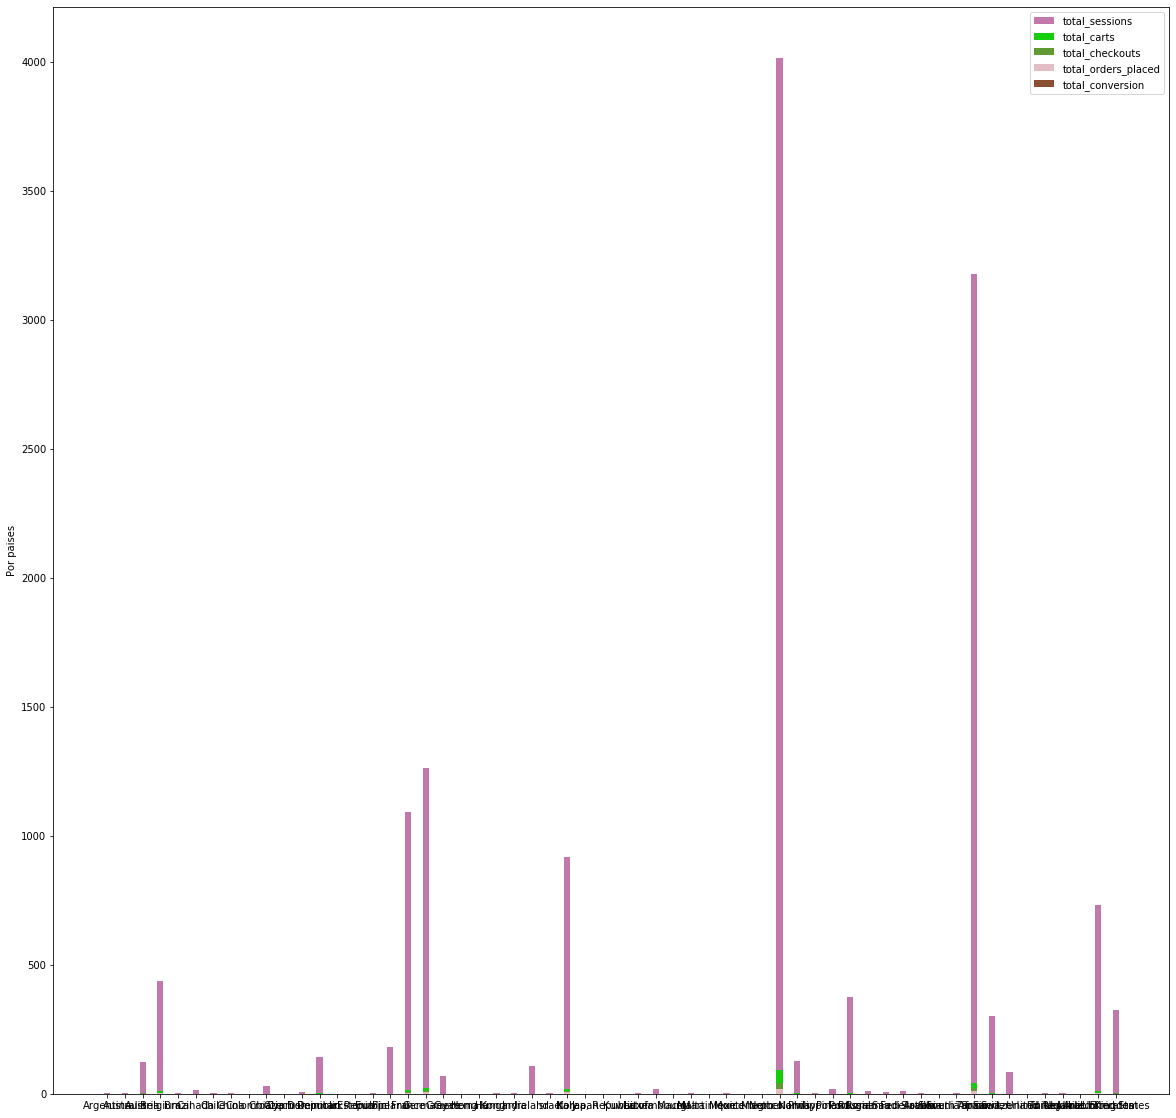

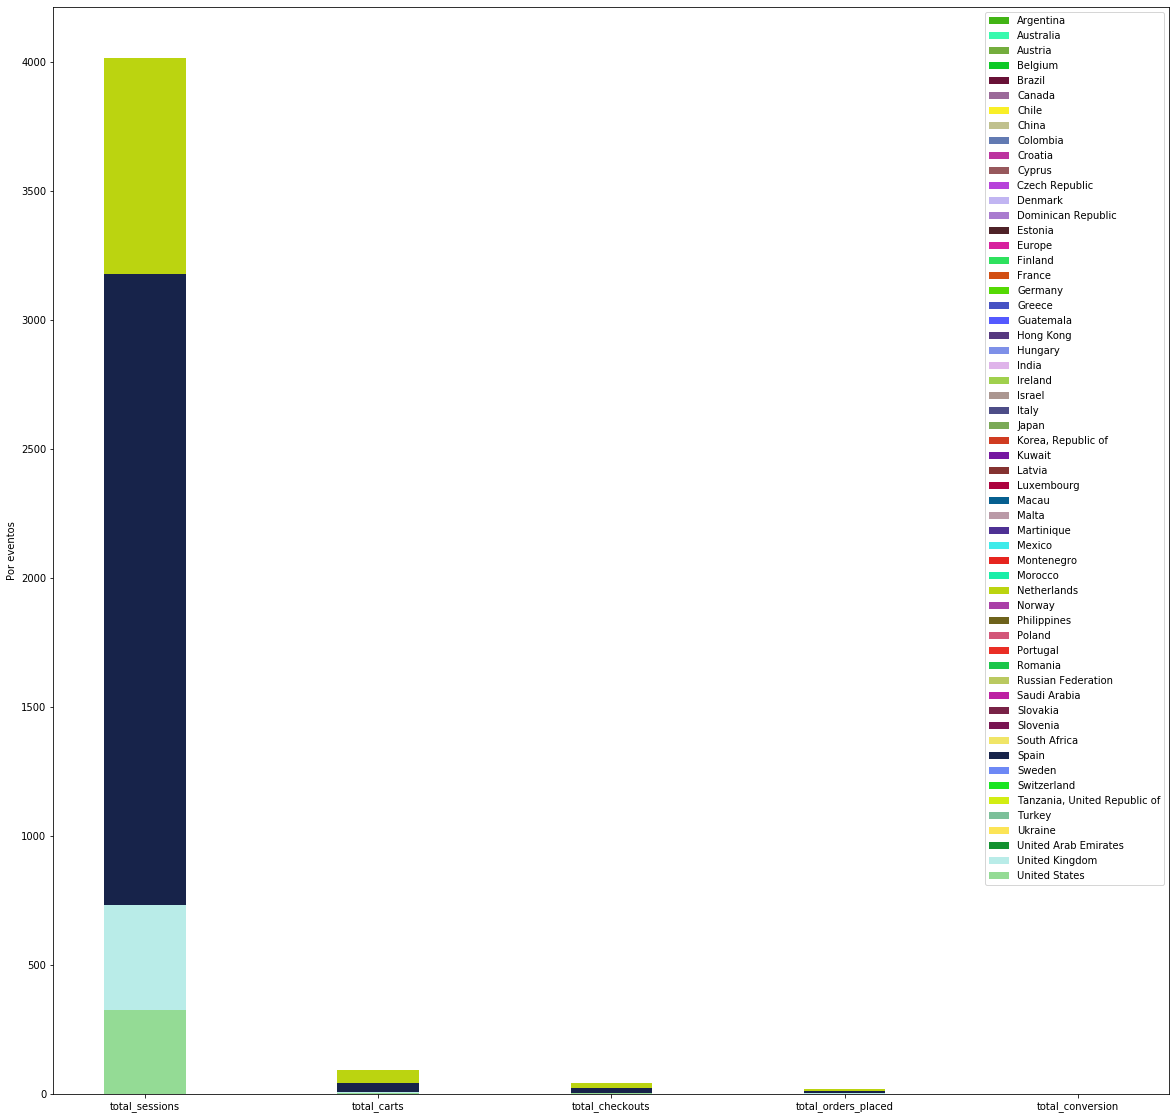

In [69]:
bar_tru(shp_Oct_co, 1)

### Distribucion de paises con mas de 50 visualizciones.

In [47]:
msk_1_bq = shp_Oct_co["total_sessions"] > 50
ci_1_bq = shp_Oct_co[msk_1_bq]

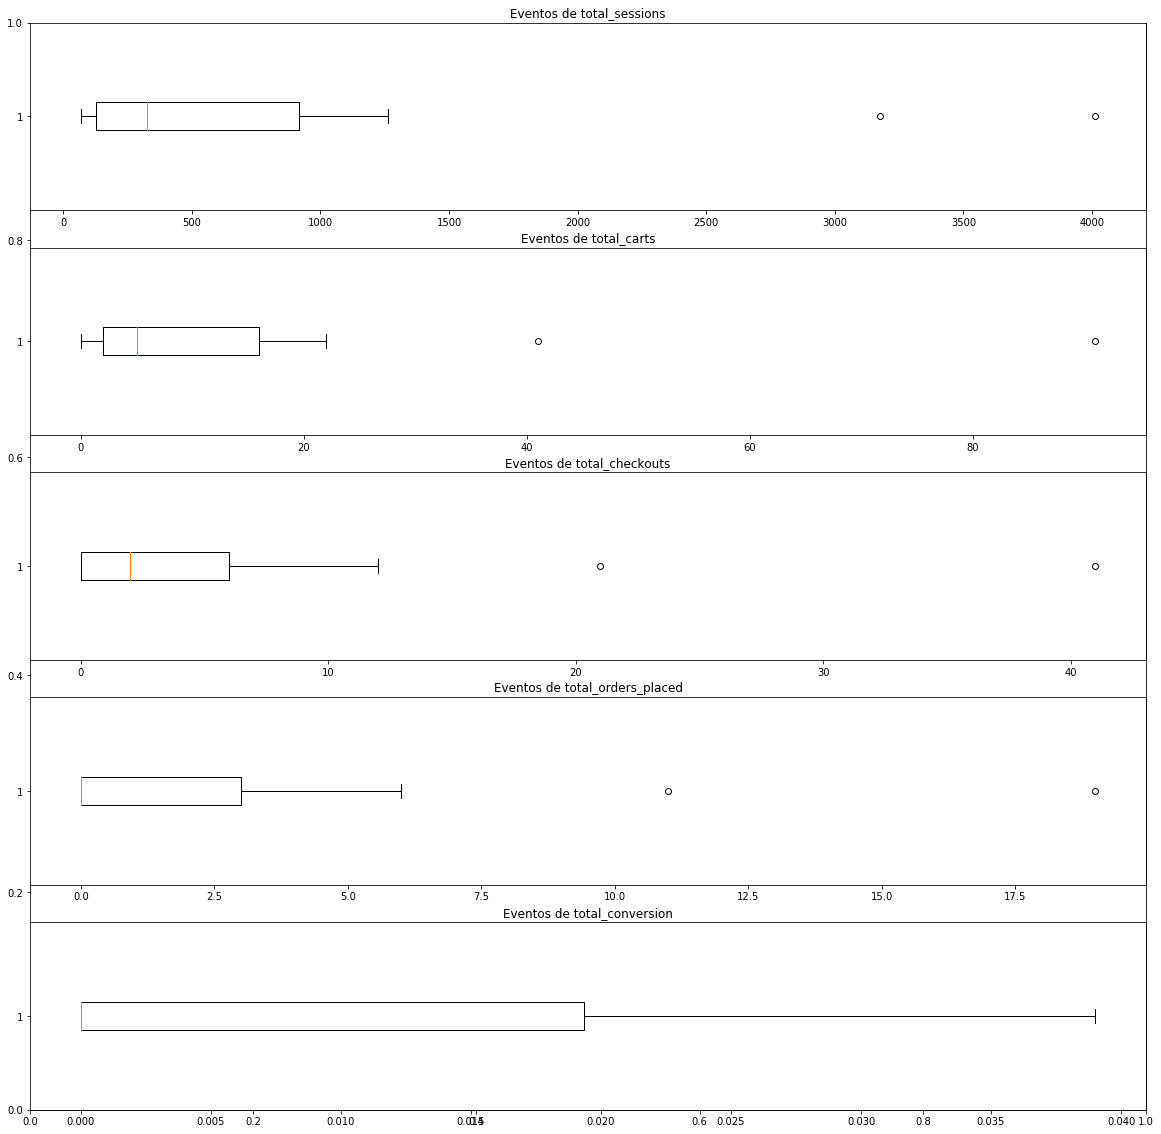

In [48]:
#fig1 = plt.figure("Vision General")
#fig1.subplots_adjust(hspace=1, wspace=1)
fig, ax = plt.subplots(figsize = (20,20), sharex = True)

i = 1
for col in ci_1_bq.columns:

    ax = fig.add_subplot(5, 1, i)
    plt.boxplot(ci_1_bq[col], vert=False)    
#Esto nos permite cambiar la horientacion de la etiquetas.
    plt.title('Eventos de %s' % col)
    i += 1

plt.show()

In [49]:
print("El numero de paises en el primer bloque es: ", str(len(ci_1_bq)))

El numero de paises en el primer bloque es:  17


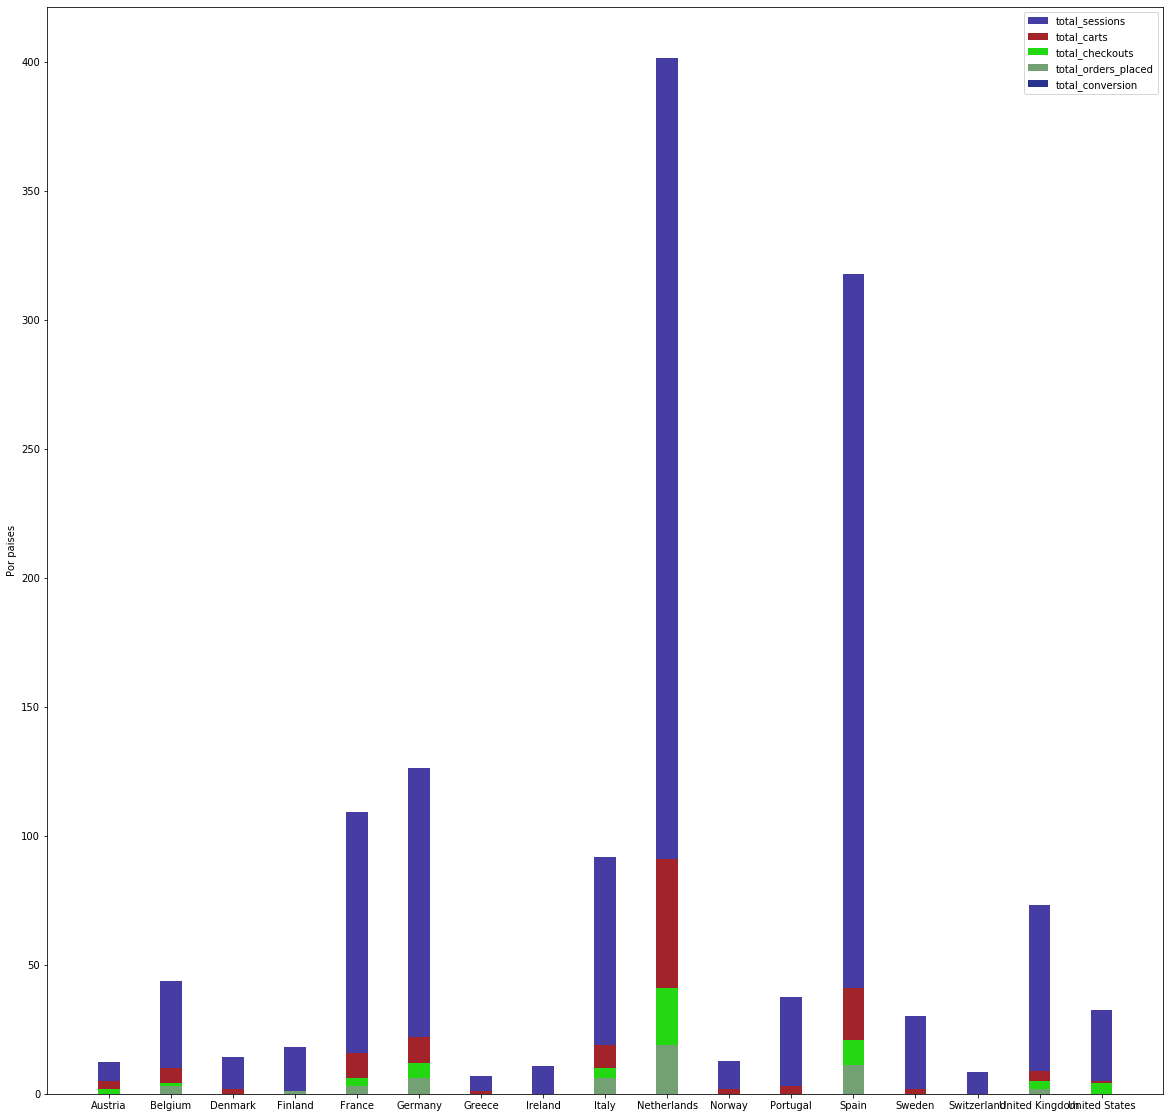

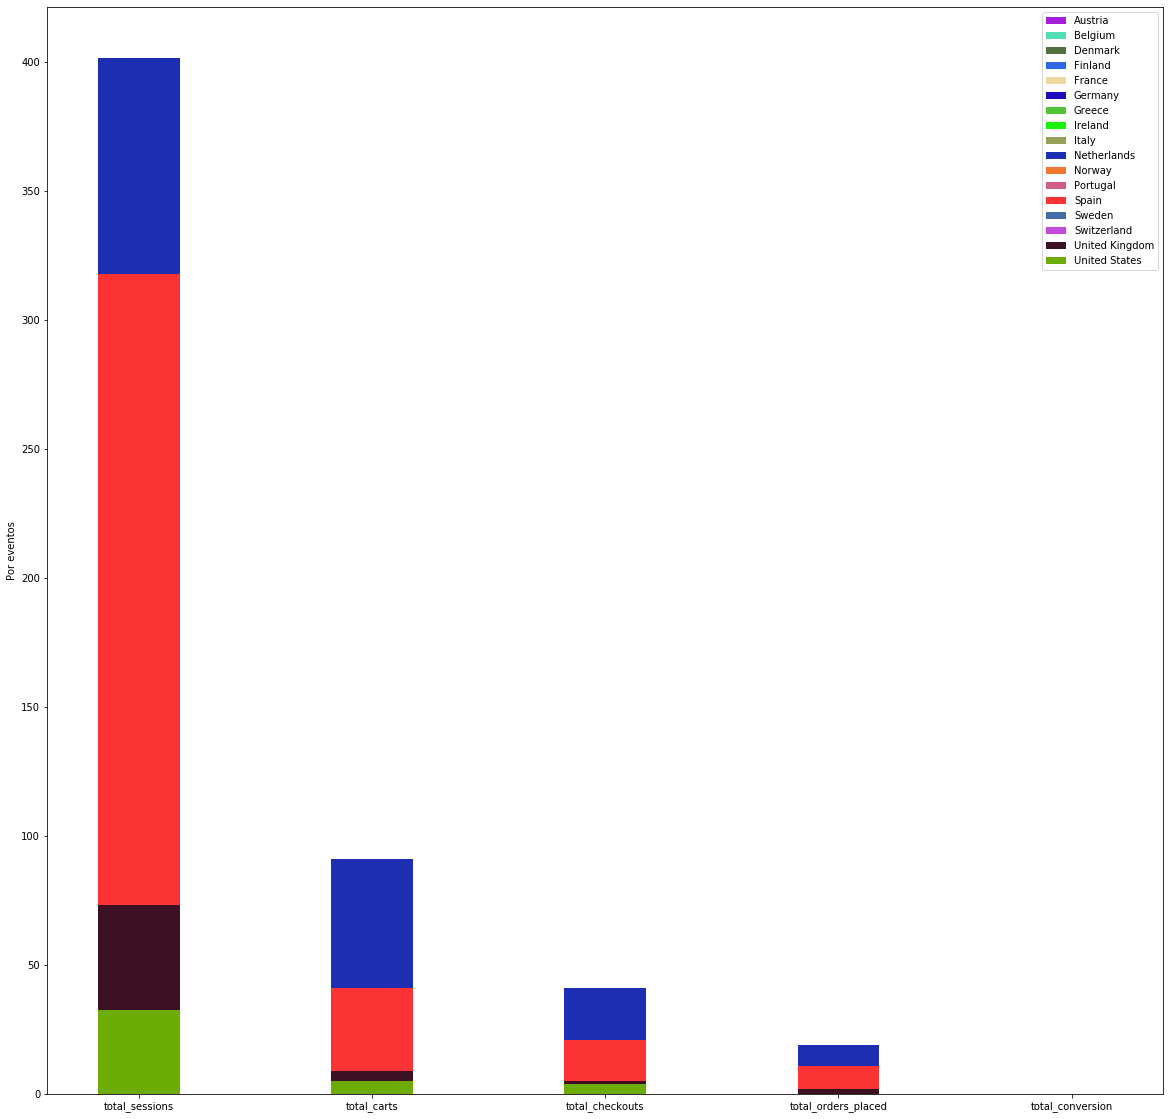

In [70]:
bar_tru(ci_1_bq, 10)

### Distribucion de paises con mas de 150 visitas.

In [51]:
msk_2_bq = shp_Oct_co["total_sessions"] > 150
ci_2_bq = shp_Oct_co[msk_2_bq]

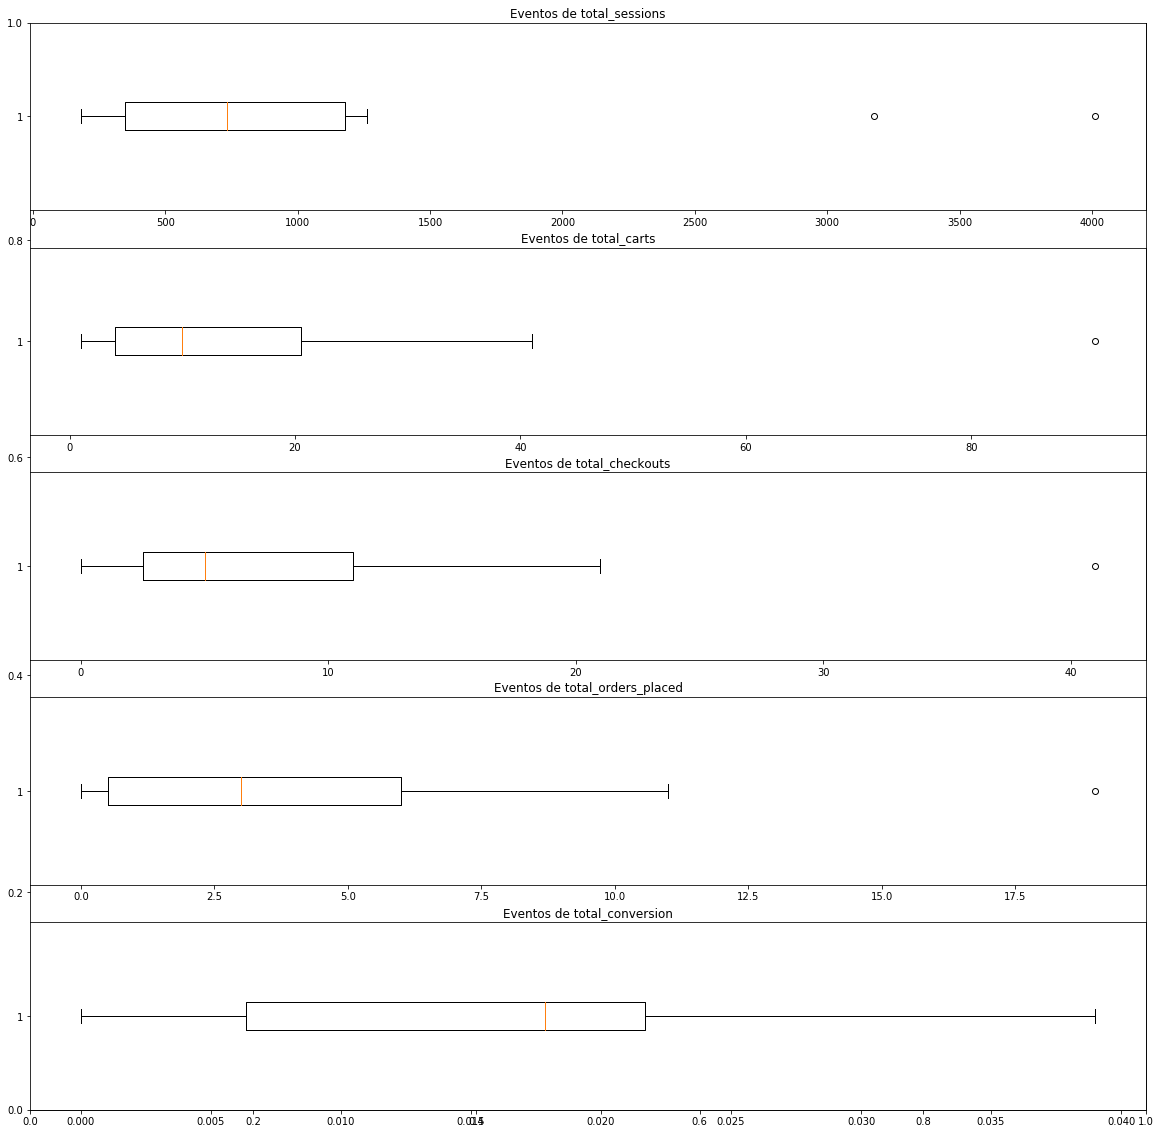

In [52]:
#fig1 = plt.figure("Vision General")
#fig1.subplots_adjust(hspace=1, wspace=1)
fig, ax = plt.subplots(figsize = (20,20), sharex = True)

i = 1
for col in ci_2_bq.columns:

    ax = fig.add_subplot(5, 1, i)
    plt.boxplot(ci_2_bq[col], vert=False)    
#Esto nos permite cambiar la horientacion de la etiquetas.
    plt.title('Eventos de %s' % col)
    i += 1

plt.show()

In [53]:
print("El numero de paises en el primer bloque es: ", str(len(ci_2_bq)))

El numero de paises en el primer bloque es:  11


Planteamos la normalizacion de la columna total_sessions. De esta forma pretendemos visibilizar la progresion de eventos con mejor resolucion,

In [54]:
#Vamos a normalizar la columna total_sessions
ci_2_bq_nor = copy.copy(ci_2_bq)
ci_2_bq_nor["total_sessions"] = ci_2_bq_nor["total_sessions"]/10

In [55]:
ci_2_bq_nor.head()

,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
location_country,,,,,
Belgium,43.9,10,4,3,0.03901
Finland,18.1,1,1,1,0.01785
France,109.2,16,6,3,0.01270
Germany,126.3,22,12,6,0.01934
Italy,91.6,19,10,6,0.03008


In [56]:
def plot_Bars(df, titulo:str):
        
    ind = df.index # the x locations for the groups
    width = 0.35
    fig1, ax1 = plt.subplots(figsize = (20,20), sharex = True)

    for cont in df.columns:
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        ax1.bar(ind, df[cont], width, color=color)
        
    ax1.set_ylabel(titulo)
    ax1.legend(labels=df.columns)
    plt.show()

In [57]:
def bar_tru(df, nor:int):
    
    #Reducimos el valor de la columna total_sessions
    df_c = copy.copy(df)
    df_c["total_sessions"] = df_c["total_sessions"]/nor
    
    #Pintamos grafica de barras
    plot_Bars(df_c, "Por paises")
    
    df_t = df_c.T
    #Pintamos grafica de barras de df trans.
    plot_Bars(df_t, "Por eventos")

In [58]:
#bar_tru(ci_2_bq_nor, 1)

In [59]:
schp_year_gr.index[0]

('Afghanistan', '2020-08')

In [1]:
#bar_tru(schp_year_gr,10)

### Data Value

Vamos a desarrollar una serie de visualizaciones y de selecciones para encontrar informacion.

In [61]:
shp_ct_co = copy.copy(shp_Oct_co)
shp_ct_co.head()

,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
location_country,,,,,
Argentina,3,0,0,0,0.00000
Australia,2,0,0,0,0.00000
Austria,125,5,2,0,0.00000
Belgium,439,10,4,3,0.03901
Brazil,5,0,0,0,0.00000


In [62]:
shp_ct_co.sort_values(["total_conversion"], ascending=False)

,total_sessions,total_carts,total_checkouts,total_orders_placed,total_conversion
location_country,,,,,
Belgium,439,10,4,3,0.03901
Italy,916,19,10,6,0.03008
Netherlands,4013,91,41,19,0.02213
United Kingdom,732,9,5,2,0.02129
Germany,1263,22,12,6,0.01934
Finland,181,1,1,1,0.01785
Spain,3176,41,21,11,0.01638
France,1092,16,6,3,0.01270
Morocco,1,0,0,0,0.00000


In [63]:
msk_conversions = shp_ct_co["total_conversion"] == 0
shp_Oct_co_0 =  shp_ct_co[msk_conversions]
msk_conversions = shp_ct_co["total_conversion"] != 0
shp_Oct_co_1 =  shp_ct_co[msk_conversions]

In [64]:
len(shp_Oct_co_0)

50

In [65]:
len(shp_Oct_co_1)

8

#### 2 Grupos
- Vemos que hay una fuerte diferencia entre los paises que tienen conversion positiva y aquellos que no.

- Ahora sobre aquellos que no tienen conversion vamos a ver cuales son aquellos en los que el avance ha sido mas significativo.

In [66]:
msk_carts = shp_Oct_co_0["total_carts"] != 0
shp_Oct_co_0_1 =  shp_Oct_co_0[msk_carts]
len(shp_Oct_co_0_1)

11

Vemos que frente de los 50 paises en los cuales han habido visualizaciones la lista se ha reducido a 11 cuando esperamos que añadan al carrito.

Vamos a seleccionar aquellos paises donde se ha realizado campaña pero no se ha conseguido añadir al carrito.

In [67]:
msk_carts_0 = shp_Oct_co_0["total_carts"] == 0
shp_Oct_co_0_0 =  shp_Oct_co_0[msk_carts_0]

paises_sc = len(shp_Oct_co_0_0)
total_view = shp_Oct_co_0_0["total_sessions"].sum()
print("El numero de paises sin carrito es:", paises_sc)
print("El numero de visualizacion para paises sin carrito es:", total_view)

El numero de paises sin carrito es: 39
El numero de visualizacion para paises sin carrito es: 324
